In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [40]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Load all the data

In [41]:
files_train = ['2019-2020.csv', '2020-2021.csv', '2021-2022.csv', 
              '2022-2023.csv']

files_valid = '2023-2024.csv'

df_train = pd.DataFrame()

for file in files_train:
    temp = pd.read_csv(file)
    df_train = pd.concat([df_train, temp], axis = 0)

df_valid = pd.read_csv(files_valid)

print(df_train.shape)
print(df_valid.shape)

(1520, 106)
(380, 106)


Understand the variables

In [42]:
variables = pd.DataFrame(columns=['Variable', 'Number of unique values', 'Values'])

for i, var in enumerate(df_train.columns):
    variables.loc[i] = [var, df_train[var].nunique, df_train[var].unique().tolist()]

variables

,Variable,Number of unique values,Values
0,Div,<bound method IndexOpsMixin.nunique of 0 ...,[E0]
1,Date,<bound method IndexOpsMixin.nunique of 0 ...,"[09/08/2019, 10/08/2019, 11/08/2019, 17/08/201..."
2,Time,<bound method IndexOpsMixin.nunique of 0 ...,"[20:00, 12:30, 15:00, 17:30, 14:00, 16:30, 19:..."
3,HomeTeam,<bound method IndexOpsMixin.nunique of 0 ...,"[Liverpool, West Ham, Bournemouth, Burnley, Cr..."
4,AwayTeam,<bound method IndexOpsMixin.nunique of 0 ...,"[Norwich, Man City, Sheffield United, Southamp..."
5,FTHG,<bound method IndexOpsMixin.nunique of 0 ...,"[4, 0, 1, 3, 2, 8, 5, 7, 6, 9]"
6,FTAG,<bound method IndexOpsMixin.nunique of 0 ...,"[1, 5, 0, 3, 2, 4, 9, 6, 7]"
7,FTR,<bound method IndexOpsMixin.nunique of 0 ...,"[H, A, D]"
8,HTHG,<bound method IndexOpsMixin.nunique of 0 ...,"[4, 0, 1, 2, 5, 3]"
9,HTAG,<bound method IndexOpsMixin.nunique of 0 ...,"[0, 1, 2, 3, 5, 4]"


### Data Dictionary

|**variable**   |**class**  |**description**|
|---------------|-----------|---------------|
|**Results Data**|
|Div            |String     |League Division|
|Date           |Datetime   |Match Date (dd/mm/yy)|
|Time           |Time       |Time of match kick off|
|HomeTeam       |String     |Home Team|
|AwayTeam       |String     |Away Team|
|FTHG and HG    |int        |Full Time Home Team Goals|
|FTAG and AG    |int        |Full Time Away Team Goals|
|FTR and Res    |String     |Full Time Result (H=Home Win, D=Draw, A=Away Win)|
|HTHG           |int        |Half Time Home Team Goals|
|HTAG           |int        |Half Time Away Team Goals
|HTR            |String     |Half Time Result (H=Home Win, D=Draw, A=Away Win)|
|Referee        |String     |Match Referee|
|HS             |int        |Home Team Shots|
|AS             |int        |Away Team Shots|
|HST            |int        |Home Team Shots on Target|
|AST            |int        |Away Team Shots on Target|
|HHW            |int        |Home Team Hit Woodwork
|AHW            |int        |Away Team Hit Woodwork
|HC             |int        |Home Team Corners
|AC             |int        |Away Team Corners
|HF             |int        |Home Team Fouls Committed
|AF             |int        |Away Team Fouls Committed
|HFKC           |int        |Home Team Free Kicks Conceded
|AFKC           |int        |Away Team Free Kicks Conceded
|HO             |int        |Home Team Offsides
|AO             |int        |Away Team Offsides
|HY             |int        |Home Team Yellow Cards
|AY             |int        |Away Team Yellow Cards
|HR             |int        |Home Team Red Cards
|AR             |int        |Away Team Red Cards
|HBP            |int        |Home Team Bookings Points (10 = yellow, 25 = red)
|ABP            |int        |Away Team Bookings Points (10 = yellow, 25 = red)

Note that Free Kicks Conceded includes fouls, offsides and any other offense committed and will always be equal to or higher than the number of fouls. Fouls make up the vast majority of Free Kicks Conceded. Free Kicks Conceded are shown when specific data on Fouls are not available (France 2nd, Belgium 1st and Greece 1st divisions).

### Let's explore some interesting questions
* Can we train machine learning models to find out who wins a game?
* Is there a correlation between the number of shots and number of goals?

### Explatory Data Analysis (EDA)

First of all, let's filter our dataframe by some match statistics before the game to train our models and make predictions

In [43]:
df_score_train = df_train[["Time", "HomeTeam", "AwayTeam", "Referee", "FTR"]]
df_score_valid = df_valid[["Time", "HomeTeam", "AwayTeam", "Referee", "FTR"]]


df_score_train.head()

,Time,HomeTeam,AwayTeam,Referee,FTR
0,20:00,Liverpool,Norwich,M Oliver,H
1,12:30,West Ham,Man City,M Dean,A
2,15:00,Bournemouth,Sheffield United,K Friend,D
3,15:00,Burnley,Southampton,G Scott,H
4,15:00,Crystal Palace,Everton,J Moss,D


Now let's ensure there are no nulls:

In [44]:
df_score_train.isnull().sum()

Time        0
HomeTeam    0
AwayTeam    0
Referee     0
FTR         0
dtype: int64

In [45]:
df_score_valid.isnull().sum()

Time        0
HomeTeam    0
AwayTeam    0
Referee     0
FTR         0
dtype: int64

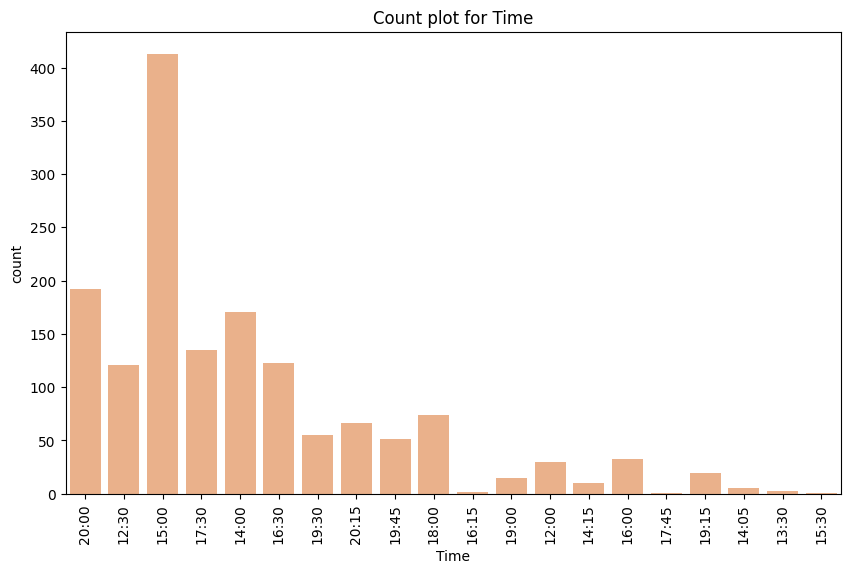

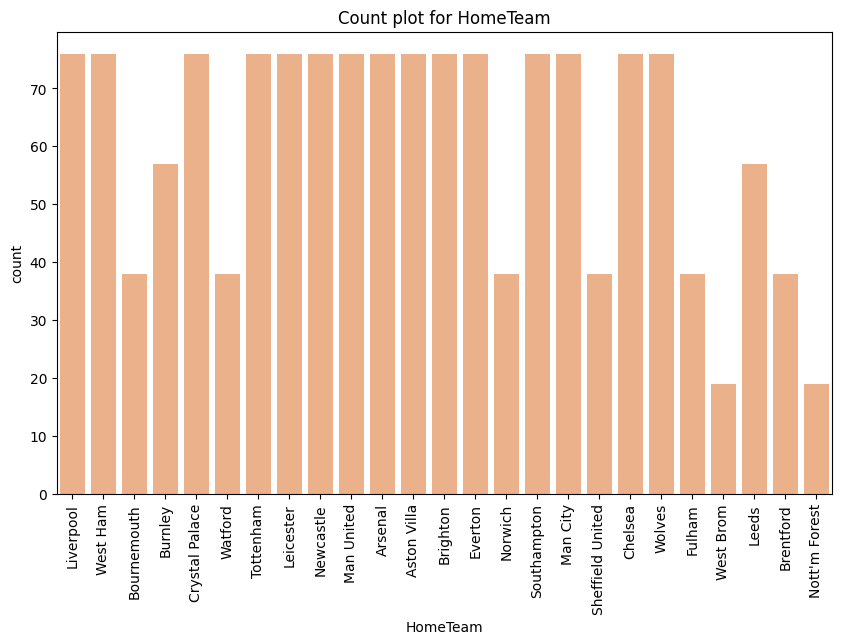

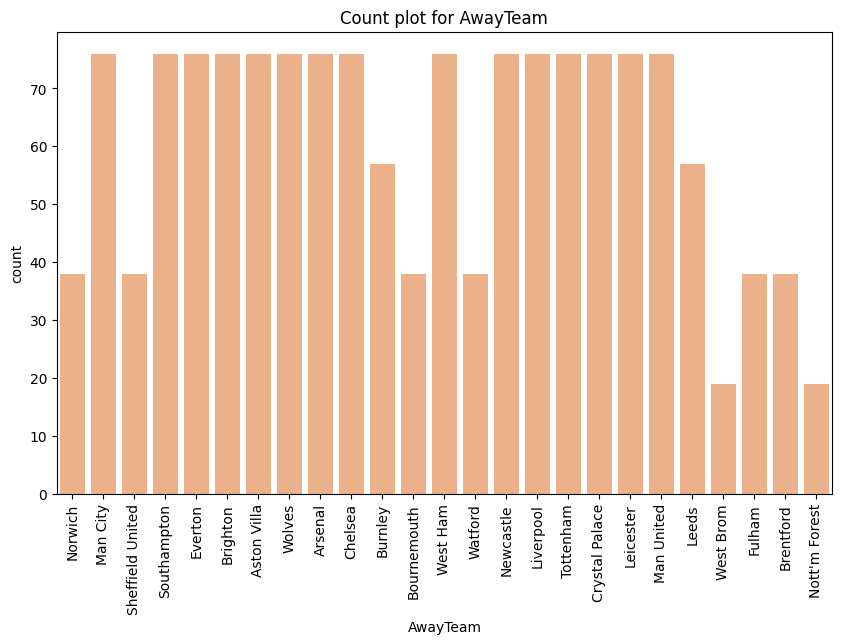

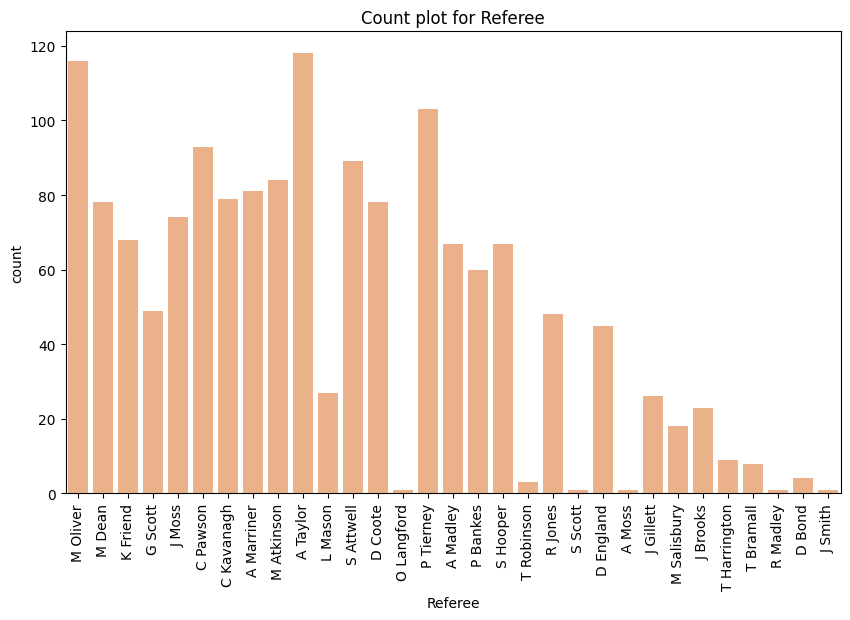

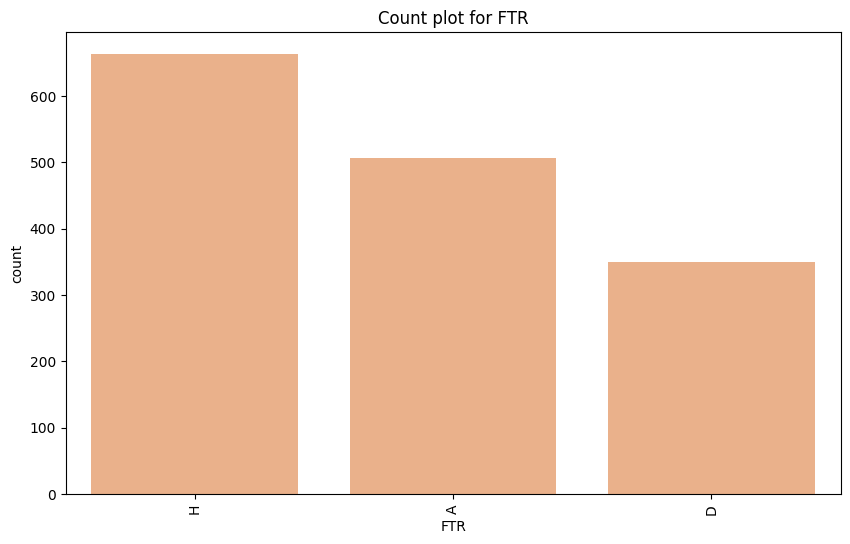

In [46]:
cols = ["Time", "HomeTeam", "AwayTeam", "Referee", "FTR"]

for col in cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x = col, data=df_score_train, palette=["#FAAE7B"])
    plt.title(f'Count plot for {col}')
    plt.xticks(rotation = 90)
    plt.show()

Merge the training data with the validation data in order to do one-hot encoding and get consistent columns

In [47]:
print(df_score_train.shape)
print(df_score_valid.shape)

train_res = df_score_train['FTR']
valid_res = df_score_valid['FTR']

print(df_score_train.columns)

df_score = pd.concat([df_score_train.drop('FTR', axis=1), df_score_valid.drop('FTR', axis=1)])
df_score = pd.get_dummies(df_score)

print(df_score.columns)

(1520, 5)
(380, 5)
Index(['Time', 'HomeTeam', 'AwayTeam', 'Referee', 'FTR'], dtype='object')
Index(['Time_12:00', 'Time_12:30', 'Time_13:00', 'Time_13:30', 'Time_14:00',
       'Time_14:05', 'Time_14:15', 'Time_15:00', 'Time_15:30', 'Time_15:45',
       ...
       'Referee_R Welch', 'Referee_S Allison', 'Referee_S Attwell',
       'Referee_S Barrott', 'Referee_S Hooper', 'Referee_S Scott',
       'Referee_S Singh', 'Referee_T Bramall', 'Referee_T Harrington',
       'Referee_T Robinson'],
      dtype='object', length=112)


Once that's done, we can remove them

In [48]:
df_score_train_oh = df_score.iloc[:df_score_train.shape[0]]
df_score_valid_oh = df_score.iloc[df_score_train.shape[0]:]

df_score_train_oh.insert(df_score_train_oh.shape[1], 'FTR', train_res, True)
df_score_valid_oh.insert(df_score_valid_oh.shape[1], 'FTR', valid_res, True)

print(df_score_train.shape)
print(df_score_valid.shape)
print(df_score_train_oh.columns)

(1520, 5)
(380, 5)
Index(['Time_12:00', 'Time_12:30', 'Time_13:00', 'Time_13:30', 'Time_14:00',
       'Time_14:05', 'Time_14:15', 'Time_15:00', 'Time_15:30', 'Time_15:45',
       ...
       'Referee_S Allison', 'Referee_S Attwell', 'Referee_S Barrott',
       'Referee_S Hooper', 'Referee_S Scott', 'Referee_S Singh',
       'Referee_T Bramall', 'Referee_T Harrington', 'Referee_T Robinson',
       'FTR'],
      dtype='object', length=113)


As we can see here, there's no data leakage happening. We can move on to build our prediction models.

## Create ML models and make predictions

First, we prepare our data for training

In [49]:
target = 'FTR'

train_labels = df_score_train_oh[target].copy()
valid_labels = df_score_valid_oh[target].copy()

# Drop 'FTR' column
train_set = df_score_train_oh.drop(target, axis=1)
valid_set = df_score_valid_oh.drop(target, axis=1)

Here are the classification models we are using to make predictions:
* Stochastic Gradient Descent (SGD) Classifier
* Decision Tree Classifier
* Random Forest Classifier
* Support Vector Classifier (SVC)

Now, we set them up with default parameters.

In [50]:
sgd = SGDClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC()

We fit the models with the data we prepared

In [51]:
sgd.fit(train_set, train_labels)
dt.fit(train_set, train_labels)
rf.fit(train_set, train_labels)
svc.fit(train_set, train_labels)

SVC()

We can use the fit models to make predictions

In [52]:
y_train_sgd = sgd.predict(train_set)
y_pred_sgd = sgd.predict(valid_set)

y_train_dt = dt.predict(train_set)
y_pred_dt = dt.predict(valid_set)

y_train_rf = rf.predict(train_set)
y_pred_rf = rf.predict(valid_set)

y_train_svc = svc.predict(train_set)
y_pred_svc = svc.predict(valid_set)

We will use these predictions to build classification reports

In [53]:
print("Training performance")
print("SGD")
print(classification_report(train_labels, y_train_sgd))
print("Decision Tree")
print(classification_report(train_labels, y_train_dt))
print("Random Forest")
print(classification_report(train_labels, y_train_rf))
print("SVC")
print(classification_report(train_labels, y_train_svc))

Training performance
SGD
              precision    recall  f1-score   support

           A       0.51      0.63      0.56       507
           D       0.35      0.18      0.24       350
           H       0.61      0.67      0.63       663

    accuracy                           0.54      1520
   macro avg       0.49      0.49      0.48      1520
weighted avg       0.52      0.54      0.52      1520

Decision Tree
              precision    recall  f1-score   support

           A       0.99      1.00      1.00       507
           D       0.98      1.00      0.99       350
           H       1.00      0.98      0.99       663

    accuracy                           0.99      1520
   macro avg       0.99      0.99      0.99      1520
weighted avg       0.99      0.99      0.99      1520

Random Forest
              precision    recall  f1-score   support

           A       1.00      0.99      1.00       507
           D       0.99      0.99      0.99       350
           H       0.9

In [54]:
print("Test performance")
print("SGD")
print(classification_report(valid_labels, y_pred_sgd))
print("Decision Tree")
print(classification_report(valid_labels, y_pred_dt))
print("Random Forest")
print(classification_report(valid_labels, y_pred_rf))
print("SVC")
print(classification_report(valid_labels, y_pred_svc))

Test performance
SGD
              precision    recall  f1-score   support

           A       0.48      0.53      0.50       123
           D       0.33      0.16      0.21        82
           H       0.55      0.64      0.59       175

    accuracy                           0.50       380
   macro avg       0.45      0.44      0.44       380
weighted avg       0.48      0.50      0.48       380

Decision Tree
              precision    recall  f1-score   support

           A       0.39      0.38      0.39       123
           D       0.20      0.22      0.21        82
           H       0.51      0.49      0.50       175

    accuracy                           0.40       380
   macro avg       0.37      0.36      0.36       380
weighted avg       0.40      0.40      0.40       380

Random Forest
              precision    recall  f1-score   support

           A       0.51      0.48      0.50       123
           D       0.27      0.16      0.20        82
           H       0.52   

In [55]:
acc_train_sgd = accuracy_score(train_labels, y_train_sgd)
acc_train_dt = accuracy_score(train_labels, y_train_dt)
acc_train_rf = accuracy_score(train_labels, y_train_rf)
acc_train_svc = accuracy_score(train_labels, y_train_svc)

acc_valid_sgd = accuracy_score(valid_labels, y_pred_sgd)
acc_valid_dt = accuracy_score(valid_labels, y_pred_dt)
acc_valid_rf = accuracy_score(valid_labels, y_pred_rf)
acc_valid_svc = accuracy_score(valid_labels, y_pred_svc)

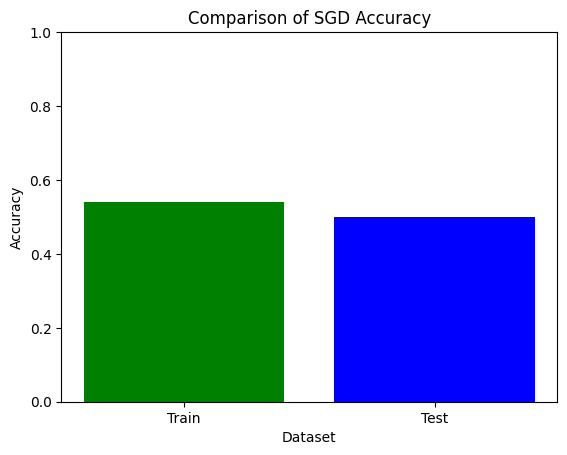

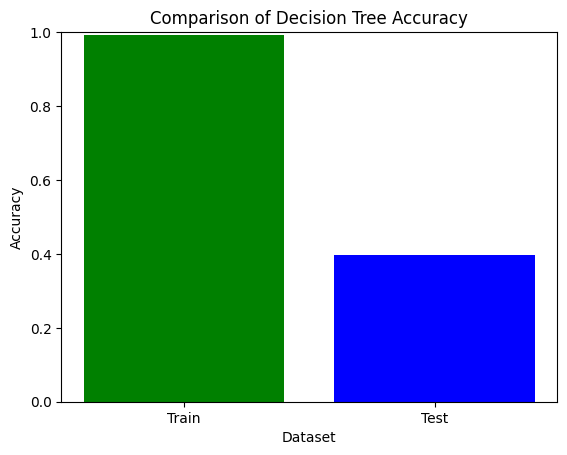

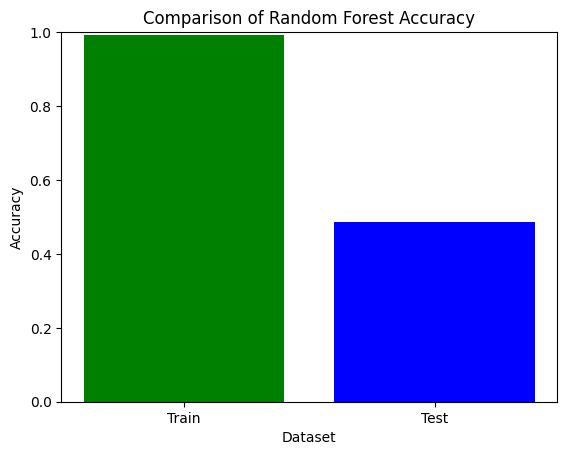

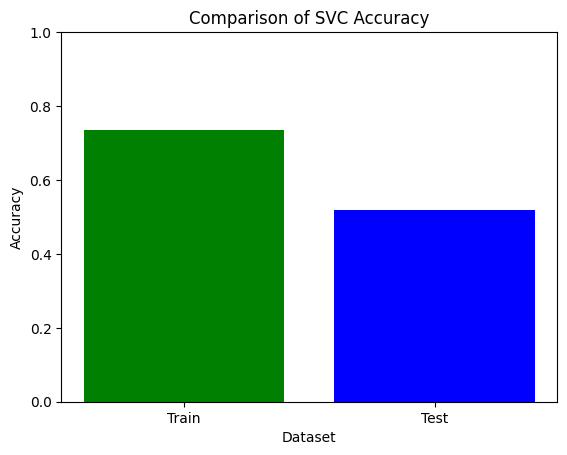

In [61]:
train_scores = [acc_train_sgd, acc_train_dt, acc_train_rf, acc_train_svc]
valid_scores = [acc_valid_sgd, acc_valid_dt, acc_valid_rf, acc_valid_svc]
algos = ["SGD", "Decision Tree", "Random Forest", "SVC"]

for i in range(len(train_scores)):
    # Plotting the comparison
    plt.bar(['Train', 'Test'], [train_scores[i], valid_scores[i]], color=['green', 'blue'])
    plt.xlabel('Dataset')
    plt.ylabel('Accuracy')
    plt.title('Comparison of ' + algos[i] + ' Accuracy')
    plt.ylim(0, 1)  # F1-score ranges from 0 to 1
    plt.show()

<Figure size 800x600 with 0 Axes>

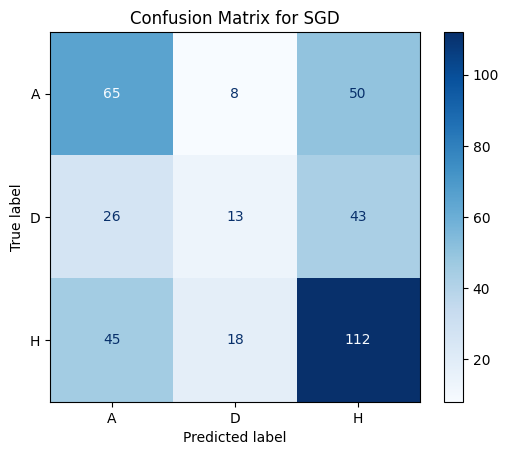

<Figure size 800x600 with 0 Axes>

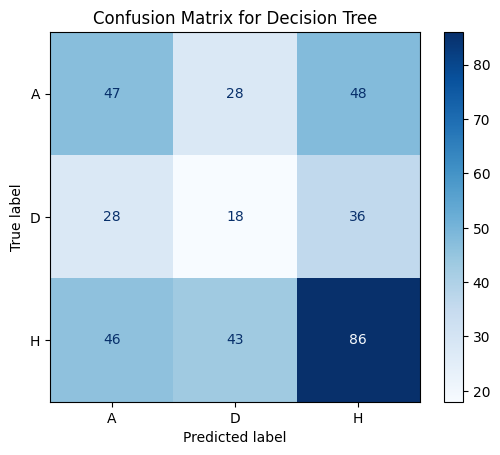

<Figure size 800x600 with 0 Axes>

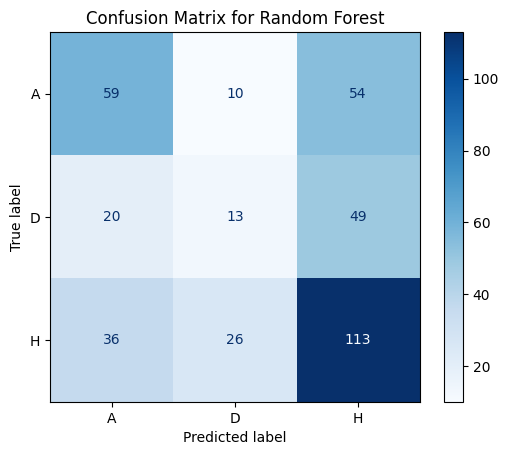

<Figure size 800x600 with 0 Axes>

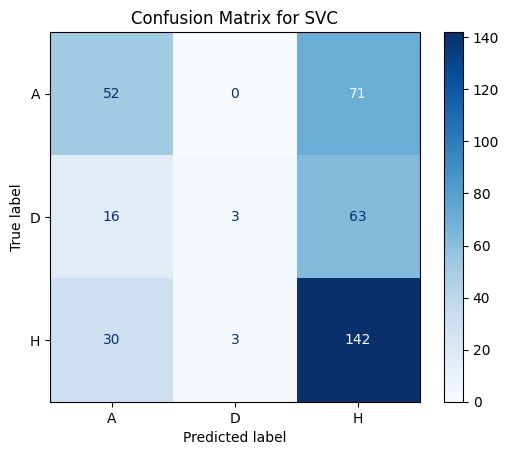

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay

preds = [y_pred_sgd, y_pred_dt, y_pred_rf, y_pred_svc]

for i in range(len(algos)):
    plt.figure(figsize=(8, 6))
    ConfusionMatrixDisplay.from_predictions(valid_labels, preds[i], cmap='Blues')
    plt.title('Confusion Matrix for ' + algos[i])
    plt.show()